In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math as m

In [4]:
# read in data
path='../runs/grid6/'
df = pd.read_pickle(path+'df_summary.pkl')

In [5]:
df.head()

,model_type,epochs,early_stopping_epoch,batch_size,lrG,flipout,kl_pref,dropout,spatial_dropout,val_mae,train_mae,train_loss,train_losses_total,train_losses_mae,val_losses_total
0,bayesian-unet,40,27,64,0.005,False,1.0,0.00,True,185.004135,193.241668,193.241623,"[255.86158854166666, 248.17623697916667, 239.6...","[255.86161039632412, 248.1762244221905, 239.60...","[236.02481, 227.9449, 219.28183, 211.58212, 20..."
1,bayesian-unet,40,13,64,0.005,True,100.0,0.00,True,191.293091,201.847023,206.286936,"[264.90227864583335, 256.0378689236111, 246.58...","[255.5264312968094, 248.05688189095744, 239.59...","[234.83047, 227.24641, 217.68787, 209.92068, 2..."
2,bayesian-unet,40,28,64,0.005,True,1000.0,0.00,True,187.432281,189.603001,190.407509,"[256.43415798611113, 248.88871527777778, 240.5...","[255.45889841449133, 247.96574200963752, 239.6...","[234.59639, 227.18747, 219.00735, 210.16875, 2..."
3,bayesian-unet,40,15,64,0.005,True,10000.0,0.00,True,190.447144,199.966659,200.069010,"[255.5847873263889, 248.1369140625, 239.757508...","[255.48342071996913, 248.03589946230255, 239.6...","[235.42033, 227.9216, 218.39929, 210.19455, 20..."
4,bayesian-unet,40,31,64,0.005,False,1.0,0.01,True,182.913757,193.761587,193.761589,"[255.86714409722222, 248.50340711805555, 239.9...","[255.86710862959444, 248.50342723692282, 239.9...","[235.96196, 228.49332, 220.44063, 211.30579, 2..."


In [6]:
df.dropout.unique()

array([0.  , 0.01, 0.05, 0.1 , 0.3 , 0.5 ])

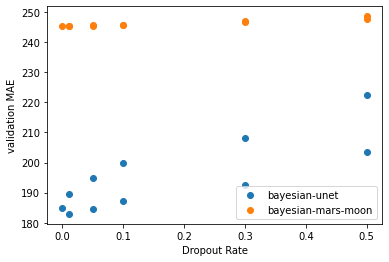

In [7]:
for model_type in df.model_type.unique():
    df_plot = df[(df.flipout==False)&(df.model_type==model_type)]
    plt.scatter(df_plot.dropout,df_plot.val_mae,label=model_type)
    plt.legend()
    plt.xlabel('Dropout Rate')
    plt.ylabel('validation MAE')

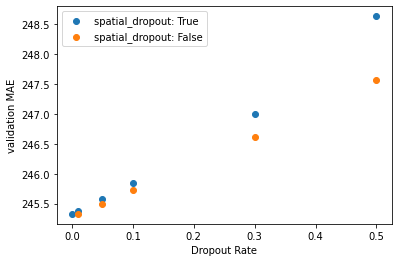

In [8]:
for spatial_do in df.spatial_dropout.unique():
    df_unet=df[(df.model_type=='bayesian-mars-moon') & (df.kl_pref==1.0) & (df.flipout==False) & (df.spatial_dropout==spatial_do)]
    plt.scatter(df_unet.dropout,df_unet.val_mae,label='spatial_dropout: {}'.format(spatial_do))
    plt.legend()
    plt.xlabel('Dropout Rate')
    plt.ylabel('validation MAE')
plt.savefig(path+'spatial_comparison.png')

In [9]:
df_unet

,model_type,epochs,early_stopping_epoch,batch_size,lrG,flipout,kl_pref,dropout,spatial_dropout,val_mae,train_mae,train_loss,train_losses_total,train_losses_mae,val_losses_total
23,bayesian-mars-moon,40,39,64,0.005,False,1.0,0.01,False,245.332062,261.960614,261.960655,"[271.5869140625, 271.2113064236111, 270.813281...","[271.5869013707459, 271.21129962584104, 270.81...","[254.90181, 254.52408, 254.08401, 253.69748, 2..."
24,bayesian-mars-moon,40,39,64,0.005,False,1.0,0.05,False,245.501022,262.115926,262.115929,"[271.5971354166667, 271.2485460069444, 270.866...","[271.59716261501313, 271.24853610372315, 270.8...","[254.93315, 254.57141, 254.13455, 253.73734, 2..."
25,bayesian-mars-moon,40,39,64,0.005,False,1.0,0.10,False,245.720505,262.294887,262.294835,"[271.6052517361111, 271.2347005208333, 270.830...","[271.60530148324136, 271.23467154717173, 270.8...","[254.93538, 254.53445, 254.10762, 253.74724, 2..."
26,bayesian-mars-moon,40,39,64,0.005,False,1.0,0.30,False,246.619186,263.200816,263.200781,"[271.6365451388889, 271.30753038194445, 270.93...","[271.6365750922116, 271.30752373708987, 270.93...","[254.99883, 254.62936, 254.25436, 253.90396, 2..."
27,bayesian-mars-moon,40,39,64,0.005,False,1.0,0.50,False,247.571503,264.081069,264.081055,"[271.68695746527777, 271.39442274305554, 271.0...","[271.68689146981376, 271.39435159753333, 271.0...","[255.06763, 254.74443, 254.41153, 254.10217, 2..."


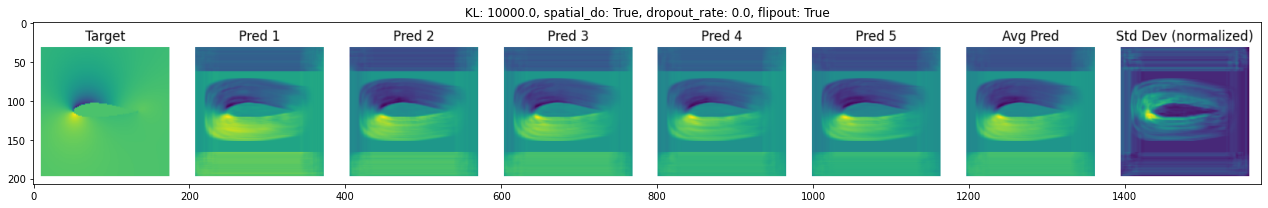

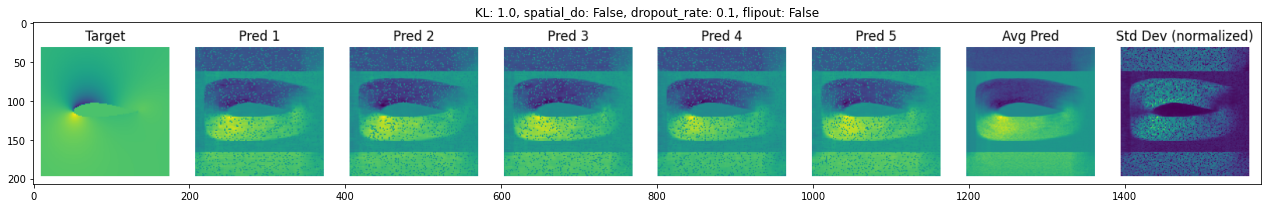

In [17]:
# mars-moon has weird features
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
kl_pref = 10000.0
spatial_dropout = True
dropout = 0.
flipout=True
model_folder='bayesian-mars-moon_bsize_64_lrG_0.005_epochs_40_klpref_{}_spatialDropout_{}_dropout_{}_flipout_{}/'.format(kl_pref, spatial_dropout, dropout, flipout)
sample_image=(mpimg.imread(path+model_folder+'Sample_idx_5.png'))
plt.figure(figsize=(22,3))
plt.title('KL: {}, spatial_do: {}, dropout_rate: {}, flipout: {}'.format(kl_pref, spatial_dropout, dropout, flipout))
plt.imshow(sample_image) 

kl_pref = 1.0
spatial_dropout = False
dropout = 0.1
flipout= False
model_folder='bayesian-mars-moon_bsize_64_lrG_0.005_epochs_40_klpref_{}_spatialDropout_{}_dropout_{}_flipout_{}/'.format(kl_pref, spatial_dropout, dropout, flipout)
sample_image=(mpimg.imread(path+model_folder+'Sample_idx_5.png'))
plt.figure(figsize=(22,3))
plt.title('KL: {}, spatial_do: {}, dropout_rate: {}, flipout: {}'.format(kl_pref, spatial_dropout, dropout, flipout))
plt.imshow(sample_image) 
plt.savefig(path+'weird_mars_moon.png')

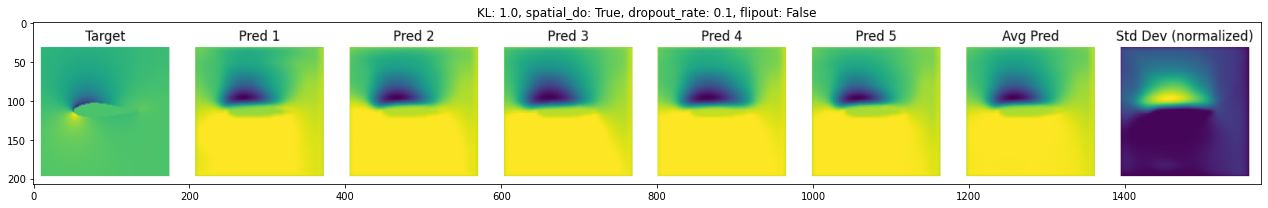

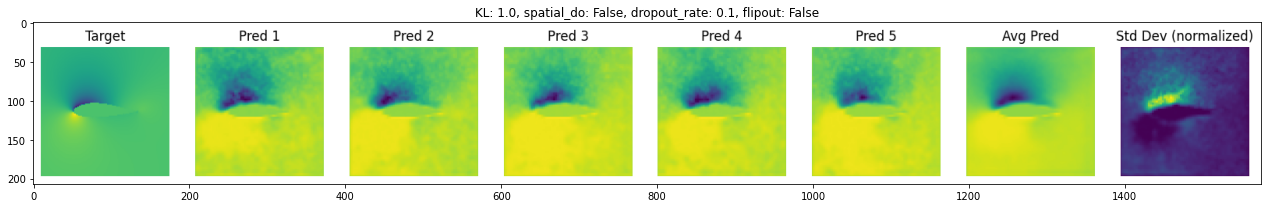

In [16]:
# difference between spatial dropout and normal dropout
# spatial seems to generate more sensible solutions
# normal dropout has unrealistic fine features, but average is good

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
kl_pref = 1.0
spatial_dropout = True
dropout = 0.1
flipout= False
model_folder='bayesian-unet_bsize_64_lrG_0.005_epochs_40_klpref_{}_spatialDropout_{}_dropout_{}_flipout_{}/'.format(kl_pref, spatial_dropout, dropout, flipout)
sample_image=(mpimg.imread(path+model_folder+'Sample_idx_5.png'))
plt.figure(figsize=(22,3))
plt.title('KL: {}, spatial_do: {}, dropout_rate: {}, flipout: {}'.format(kl_pref, spatial_dropout, dropout, flipout))
plt.imshow(sample_image) 
plt.savefig(path+'spatial_do_True_example.png')

kl_pref = 1.0
spatial_dropout = False
dropout = 0.1
flipout= False
model_folder='bayesian-unet_bsize_64_lrG_0.005_epochs_40_klpref_{}_spatialDropout_{}_dropout_{}_flipout_{}/'.format(kl_pref, spatial_dropout, dropout, flipout)
sample_image=(mpimg.imread(path+model_folder+'Sample_idx_5.png'))
plt.figure(figsize=(22,3))
plt.title('KL: {}, spatial_do: {}, dropout_rate: {}, flipout: {}'.format(kl_pref, spatial_dropout, dropout, flipout))
plt.imshow(sample_image) 
plt.savefig(path+'spatial_do_False_example.png')


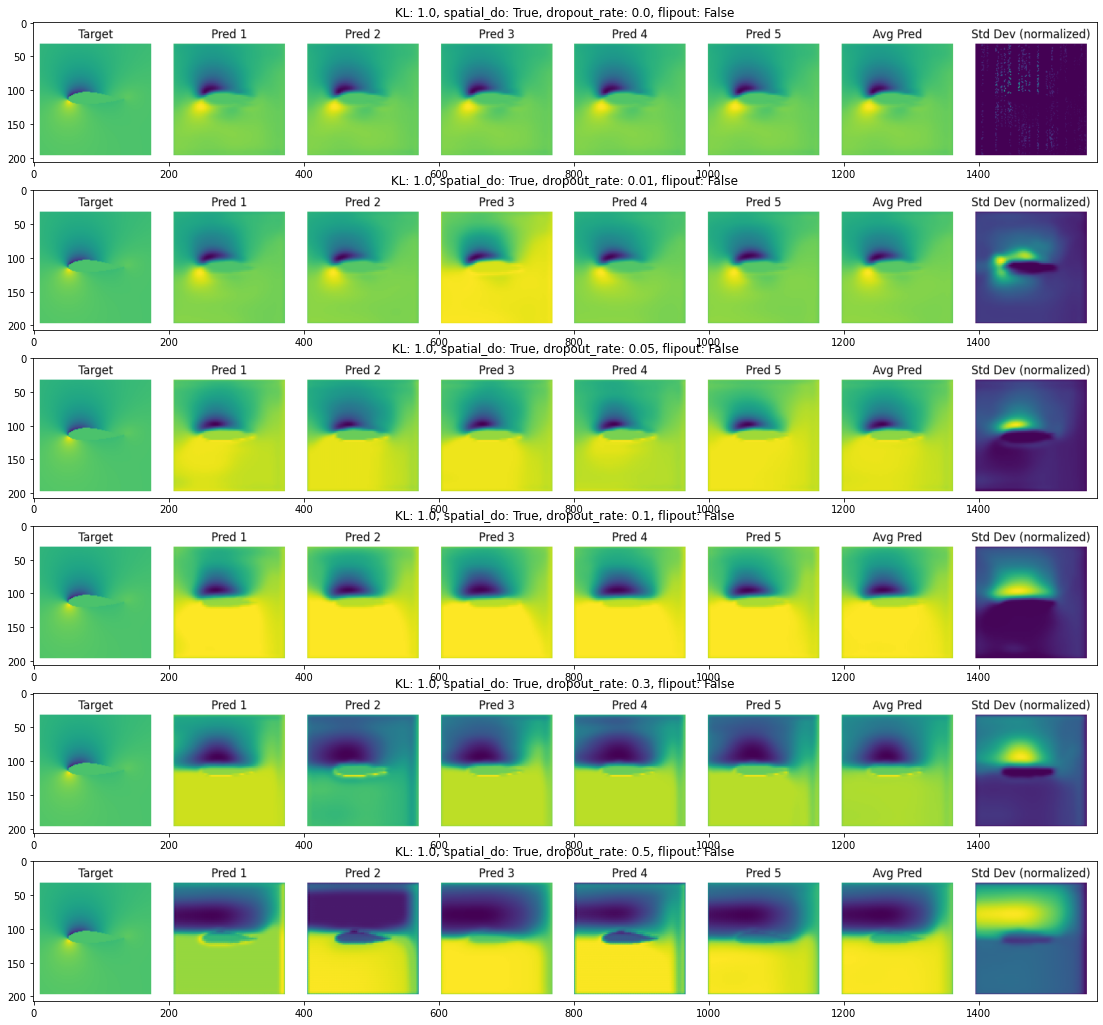

In [14]:
# effect of dropout rates - spatial dropout
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
kl_pref = 1.0
spatial_dropout = True
flipout= False
fig, axs = plt.subplots(figsize=(28,3*len(df.dropout.unique())),nrows=len(df.dropout.unique()))
for i,dropout in enumerate(df.dropout.unique()):
    model_folder='bayesian-unet_bsize_64_lrG_0.005_epochs_40_klpref_{}_spatialDropout_{}_dropout_{}_flipout_{}/'.format(kl_pref, spatial_dropout, dropout, flipout)
    sample_image=(mpimg.imread(path+model_folder+'Sample_idx_5.png'))
    axs[i].set_title('KL: {}, spatial_do: {}, dropout_rate: {}, flipout: {}'.format(kl_pref, spatial_dropout, dropout, flipout))
    axs[i].imshow(sample_image) 
    #plt.show()  #
plt.savefig(path+'SpatialDropout_True_samples.png')

# effect of dropout rates - spatial dropout
# import matplotlib.pyplot as plt
# import matplotlib.image as mpimg
# kl_pref = 1.0
# spatial_dropout = True
# flipout= False
# for dropout in df.dropout.unique():
#     model_folder='bayesian-unet_bsize_64_lrG_0.005_epochs_40_klpref_{}_spatialDropout_{}_dropout_{}_flipout_{}/'.format(kl_pref, spatial_dropout, dropout, flipout)
#     sample_image=(mpimg.imread('/home/maximilian/Dokumente/Studium/Werkstudentenjob/Nils/airfoils_tensorflow/runs_servus/grid2/'+model_folder+'Sample_idx_5.png'))
#     plt.figure(figsize=(22,3))
#     plt.title('KL: {}, spatial_do: {}, dropout_rate: {}, flipout: {}'.format(kl_pref, spatial_dropout, dropout, flipout))
#     plt.imshow(sample_image) 
#     plt.show()  #

In [16]:
df[df.dropout!=0].dropout.unique()

array([0.01, 0.05, 0.1 , 0.3 , 0.5 ])

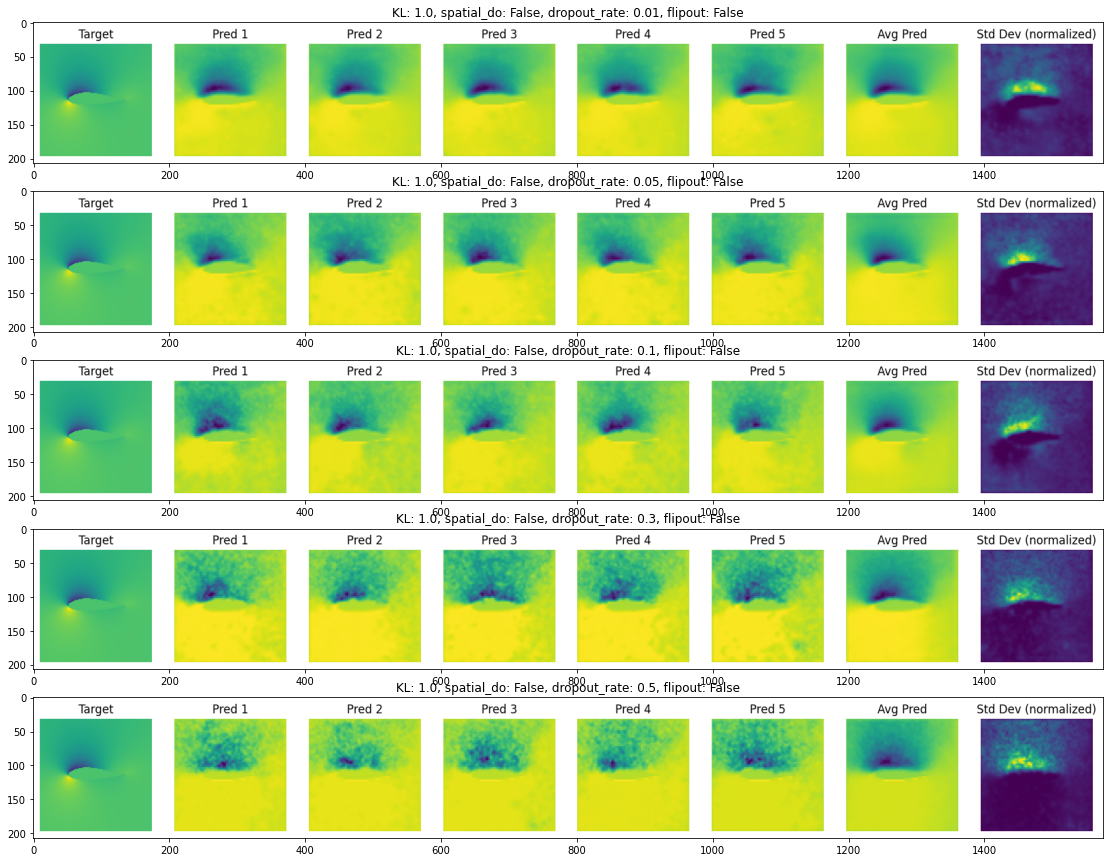

In [15]:
# # effect of dropout rates - no spatial dropout
# import matplotlib.pyplot as plt
# import matplotlib.image as mpimg
# kl_pref = 1.0
# spatial_dropout = False
# flipout= False
# for dropout in df.dropout.unique():
#     if dropout != 0.:
#         model_folder='bayesian-unet_bsize_64_lrG_0.005_epochs_40_klpref_{}_spatialDropout_{}_dropout_{}_flipout_{}/'.format(kl_pref, spatial_dropout, dropout, flipout)
#         sample_image=(mpimg.imread('/home/maximilian/Dokumente/Studium/Werkstudentenjob/Nils/airfoils_tensorflow/runs_servus/grid2/'+model_folder+'Sample_idx_5.png'))
#         plt.figure(figsize=(22,3))
#         plt.title('KL: {}, spatial_do: {}, dropout_rate: {}, flipout: {}'.format(kl_pref, spatial_dropout, dropout, flipout))
#         plt.imshow(sample_image) 
#         plt.show()  #
        
# effect of dropout rates - no spatial dropout
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
kl_pref = 1.0
spatial_dropout = False
flipout= False
fig, axs = plt.subplots(figsize=(28,3*(len(df.dropout.unique())-1)),nrows=len(df.dropout.unique())-1)
for i,dropout in enumerate(df[df.dropout!=0].dropout.unique()):
        model_folder='bayesian-unet_bsize_64_lrG_0.005_epochs_40_klpref_{}_spatialDropout_{}_dropout_{}_flipout_{}/'.format(kl_pref, spatial_dropout, dropout, flipout)
        sample_image=(mpimg.imread(path+model_folder+'Sample_idx_5.png'))
        axs[i].set_title('KL: {}, spatial_do: {}, dropout_rate: {}, flipout: {}'.format(kl_pref, spatial_dropout, dropout, flipout))
        axs[i].imshow(sample_image) 
    #plt.show()  
plt.savefig(path+'SpatialDropout_False_samples.png')
